# Multivariate Linear Regression
- `Advertising.csv` dataset from ISLR Book
- https://www.statlearning.com/resources-second-edition

#### Loading relevant libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Read the CSV file and analyze the data

In [3]:
df_AdvData = pd.read_csv("data/Advertising.csv")
df_AdvData.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df_AdvData.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [5]:
df_AdvData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
df_AdvData.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


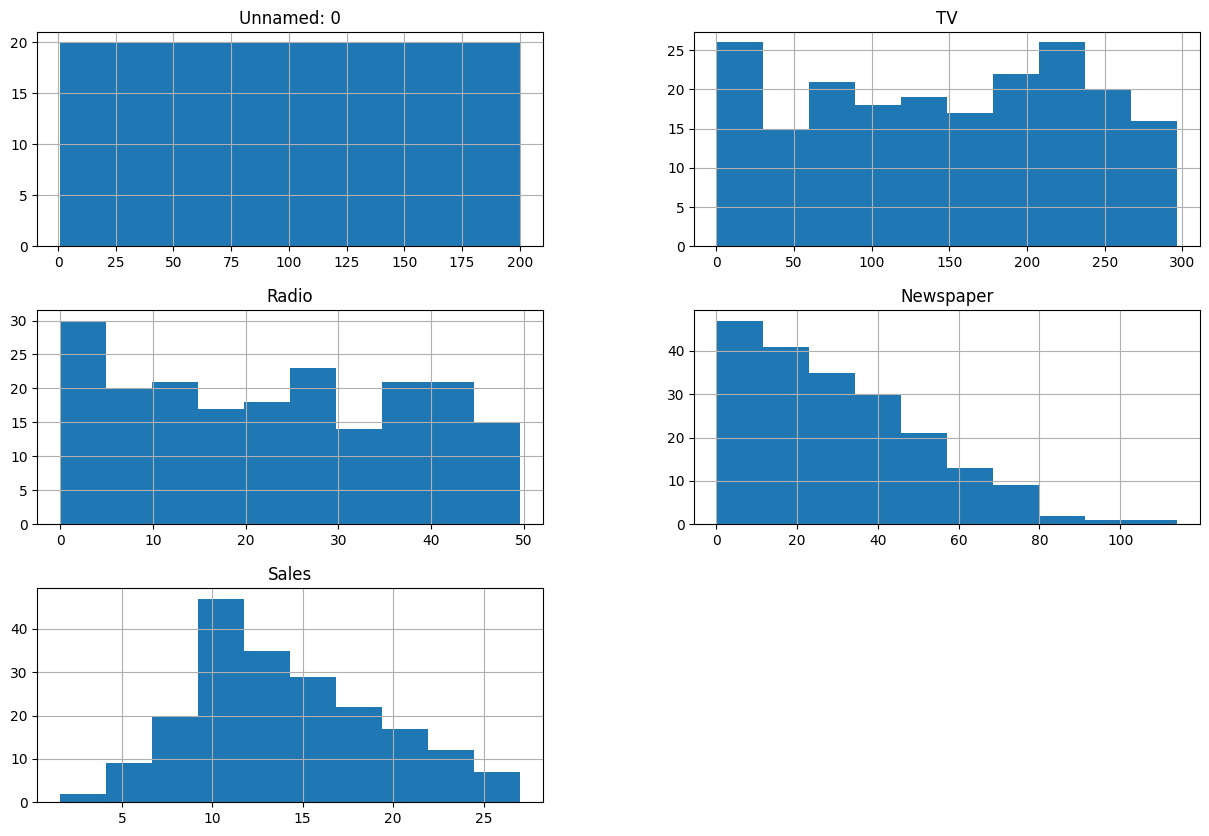

In [7]:
df_AdvData.hist(bins=10, figsize=(15,10))
plt.show()

In [8]:
df_AdvData.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

#### Remove the redundant serial number column

In [9]:
del df_AdvData["Unnamed: 0"]

In [10]:
df_AdvData.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

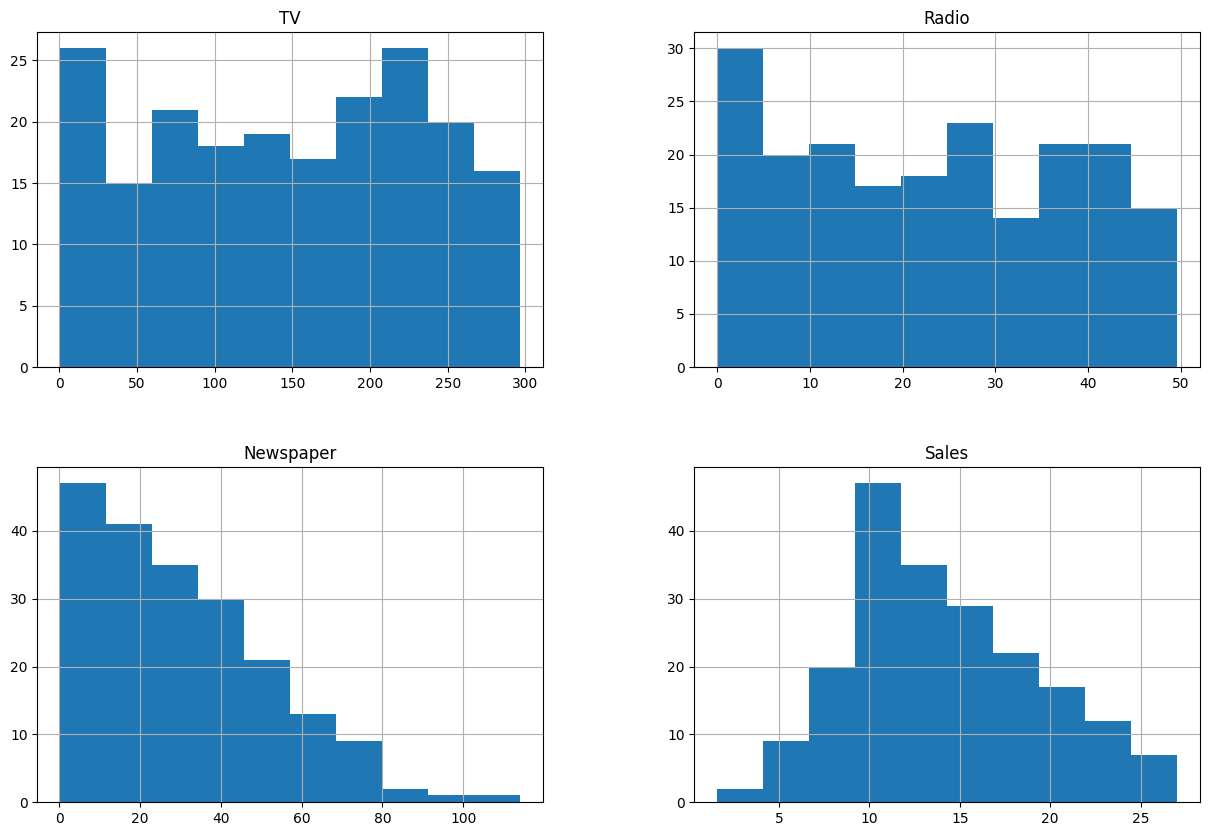

In [11]:
df_AdvData.hist(bins=10, figsize=(15,10))
plt.show()

In [12]:
df_AdvData.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


#### Visualizing the relationship

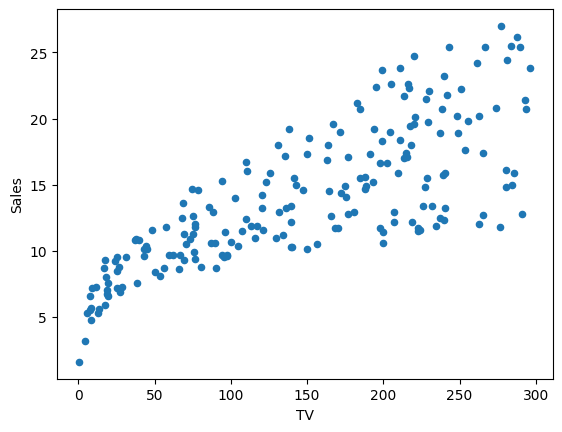

In [13]:
df_AdvData.plot(kind='scatter', x='TV', y='Sales')
plt.show()

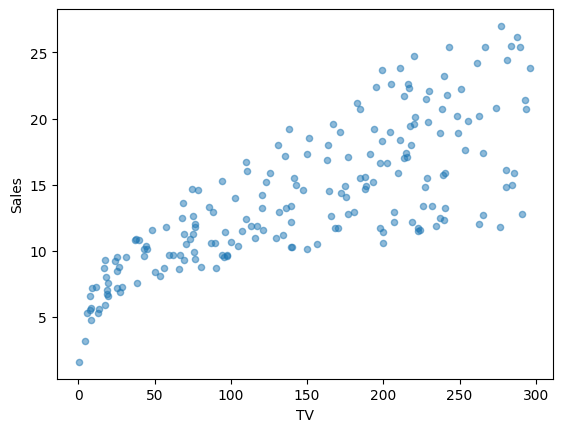

In [14]:
df_AdvData.plot(kind='scatter', x='TV', y='Sales', alpha=0.5)
plt.show()

In [15]:
correlationMatrix = df_AdvData.corr()
correlationMatrix

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


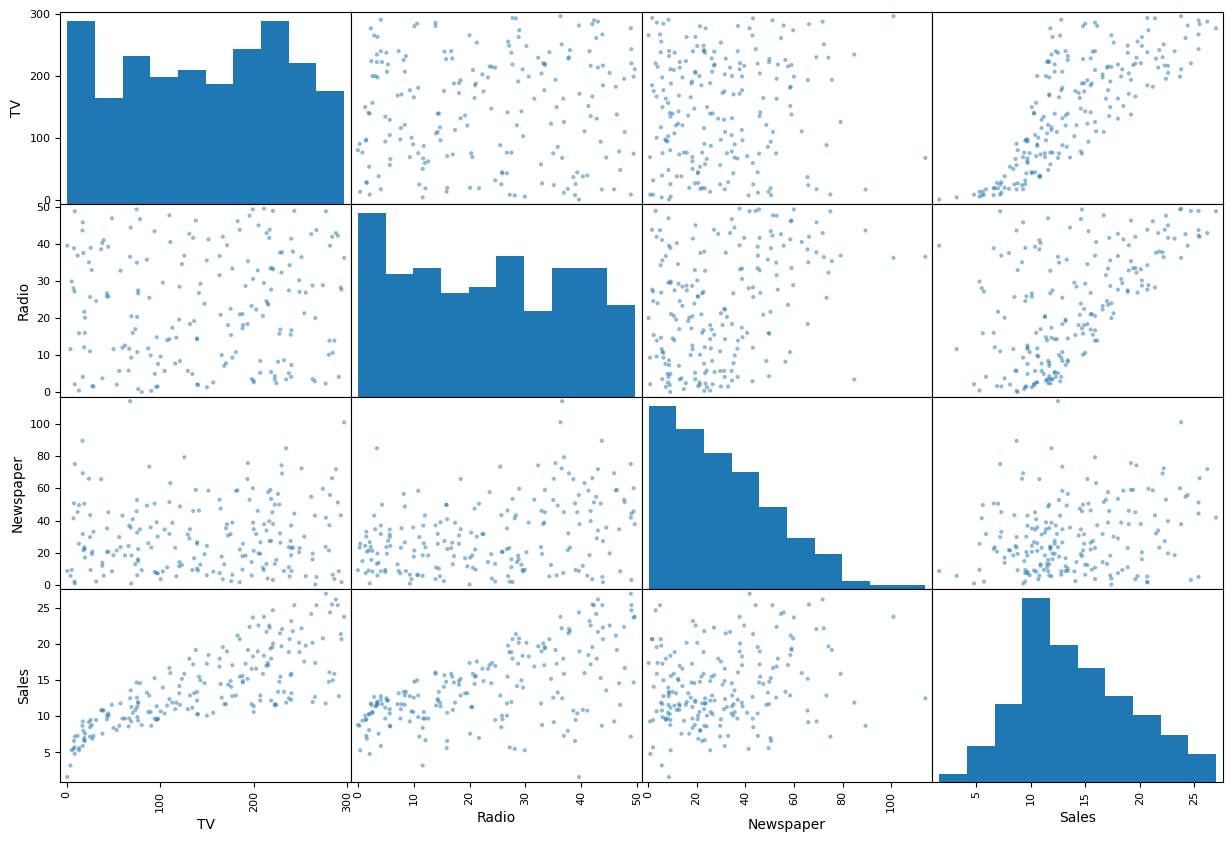

In [16]:
pd.plotting.scatter_matrix(df_AdvData, figsize=(15, 10))
plt.show()

### Preparing data for machine learning model

In [18]:
X = df_AdvData.drop("Sales", axis = 1)
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [ ]:
y = df_AdvData["Sales"]
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [ ]:
# Split it into 80% training and 20% testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

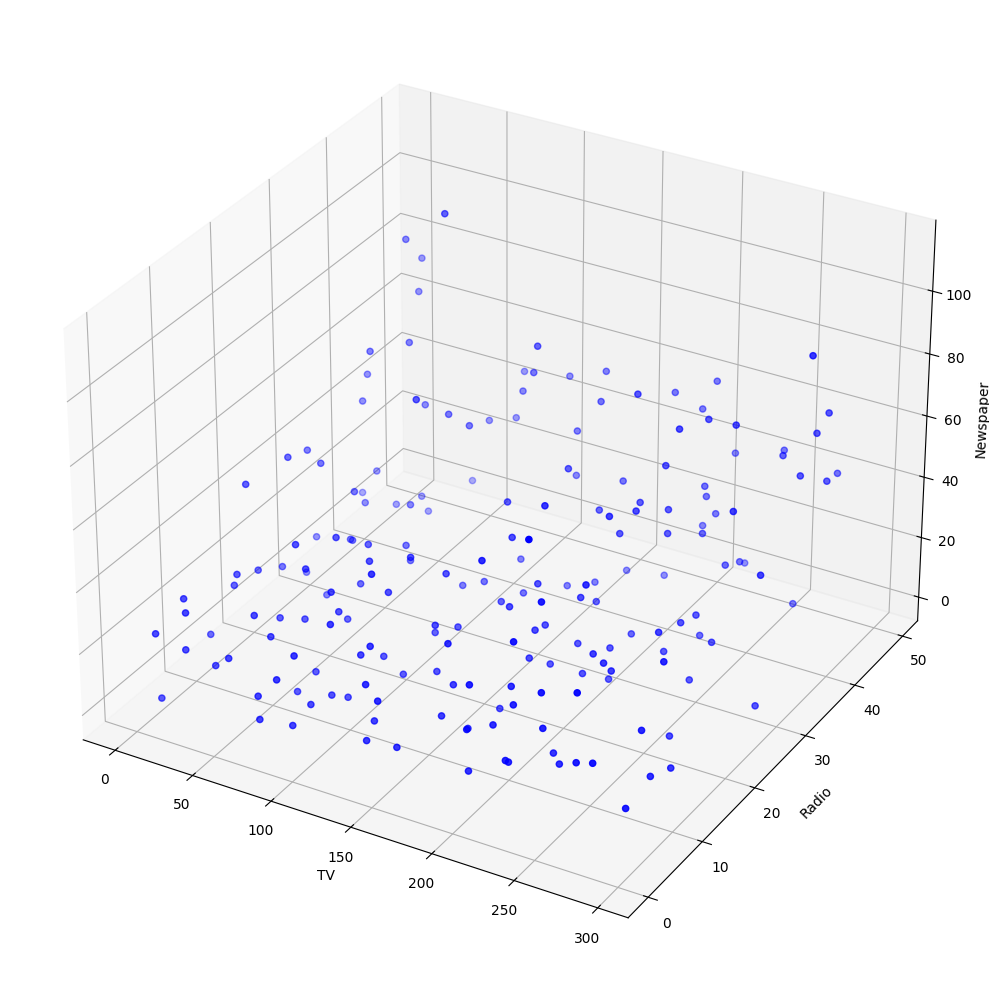

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(projection='3d')

ax.scatter(X.iloc[:, 0], X.iloc[:, 1], X.iloc[:, 2], color="b");

ax.set_xlabel("TV")
ax.set_ylabel("Radio")
ax.set_zlabel("Newspaper")

plt.tight_layout()
plt.show()

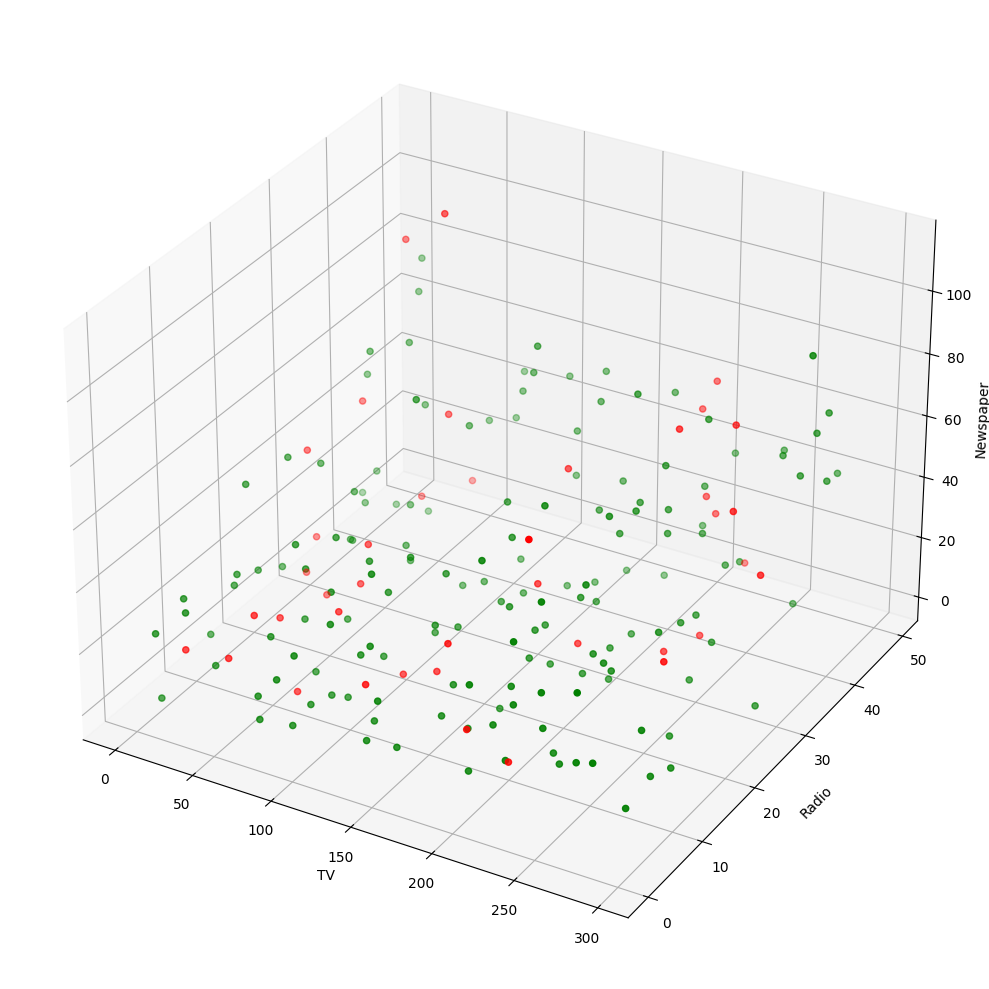

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(projection='3d')

ax.scatter(X_train.iloc[:,0], X_train.iloc[:,1], X_train.iloc[:,2], color="g");
ax.scatter(X_test.iloc[:,0], X_test.iloc[:,1], X_test.iloc[:,2], color="r");

ax.set_xlabel("TV")
ax.set_ylabel("Radio")
ax.set_zlabel("Newspaper")

plt.tight_layout()
plt.show()

In [ ]:
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
X_train = X_train.values
y_train = y_train.values

In [ ]:
print(type(X_train))

<class 'numpy.ndarray'>


In [ ]:
X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.float32)

# Combine the operations
X_test = (X_test.values).astype(np.float32)
y_test = (y_test.values).astype(np.float32)

In [ ]:
print(X_train.shape)

(160, 3)


In [ ]:
print(X_train)

[[116.    7.7  23.1]
 [177.    9.3   6.4]
 [ 43.1  26.7  35.1]
 [ 62.3  12.6  18.3]
 [224.    2.4  15.6]
 [ 38.2   3.7  13.8]
 [ 70.6  16.   40.8]
 [147.3  23.9  19.1]
 [104.6   5.7  34.4]
 [ 76.3  27.5  16. ]
 [ 78.2  46.8  34.5]
 [168.4   7.1  12.8]
 [  8.7  48.9  75. ]
 [  7.8  38.9  50.6]
 [ 76.4   0.8  14.8]
 [129.4   5.7  31.3]
 [ 73.4  17.   12.9]
 [289.7  42.3  51.2]
 [ 19.6  20.1  17. ]
 [197.6   3.5   5.9]
 [284.3  10.6   6.4]
 [184.9  21.   22. ]
 [112.9  17.4  38.6]
 [ 23.8  35.1  65.9]
 [290.7   4.1   8.5]
 [ 19.4  16.   22.3]
 [293.6  27.7   1.8]
 [ 18.7  12.1  23.4]
 [134.3   4.9   9.3]
 [ 25.6  39.    9.3]
 [100.4   9.6   3.6]
 [ 80.2   0.    9.2]
 [188.4  18.1  25.6]
 [177.   33.4  38.7]
 [125.7  36.9  79.2]
 [209.6  20.6  10.7]
 [142.9  29.3  12.6]
 [184.9  43.9   1.7]
 [222.4   4.3  49.8]
 [241.7  38.   23.2]
 [ 17.2  45.9  69.3]
 [120.5  28.5  14.2]
 [ 89.7   9.9  35.7]
 [191.1  28.7  18.2]
 [ 75.5  10.8   6. ]
 [193.2  18.4  65.7]
 [ 85.7  35.8  49.3]
 [266.9  43.8

In [ ]:
X.describe()

,TV,Radio,Newspaper
count,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000
std,85.854236,14.846809,21.778621
min,0.700000,0.000000,0.300000
25%,74.375000,9.975000,12.750000
50%,149.750000,22.900000,25.750000
75%,218.825000,36.525000,45.100000
max,296.400000,49.600000,114.000000


#### Use the LinearRegression class from sklearn

In [ ]:
from sklearn.linear_model import LinearRegression

model_linearRegression = LinearRegression()

model_linearRegression.fit(X_train, y_train)

r2_Score = model_linearRegression.score(X_test, y_test)

print(r2_Score)

0.8994379783479975


In [ ]:
# Print parameters

print(model_linearRegression.intercept_)
print(model_linearRegression.coef_)

2.9790668
[0.04472952 0.1891951  0.00276112]


$$ \hat y = 2.97 + 0.044x_1 + 0.18x_2 +0.002x_3 $$

#### Solve using Normal Equation

$$ \left( X^T \cdot X \right)^{-1} \cdot X^T \cdot y $$

In [ ]:
X_train.shape

(160, 3)

In [ ]:
X_train = np.concatenate([np.ones((X_train.shape[0], 1)), X_train], axis=1)
X_train.shape

(160, 4)

In [ ]:
X_train

array([[  1.        , 116.        ,   7.69999981,  23.10000038],
       [  1.        , 177.        ,   9.30000019,   6.4000001 ],
       [  1.        ,  43.09999847,  26.70000076,  35.09999847],
       [  1.        ,  62.29999924,  12.60000038,  18.29999924],
       [  1.        , 224.        ,   2.4000001 ,  15.60000038],
       [  1.        ,  38.20000076,   3.70000005,  13.80000019],
       [  1.        ,  70.59999847,  16.        ,  40.79999924],
       [  1.        , 147.30000305,  23.89999962,  19.10000038],
       [  1.        , 104.59999847,   5.69999981,  34.40000153],
       [  1.        ,  76.30000305,  27.5       ,  16.        ],
       [  1.        ,  78.19999695,  46.79999924,  34.5       ],
       [  1.        , 168.3999939 ,   7.0999999 ,  12.80000019],
       [  1.        ,   8.69999981,  48.90000153,  75.        ],
       [  1.        ,   7.80000019,  38.90000153,  50.59999847],
       [  1.        ,  76.40000153,   0.80000001,  14.80000019],
       [  1.        , 129

In [ ]:
from numpy.linalg import inv
from numpy import dot, transpose
np.set_printoptions(precision=6)

Theta_NE = dot(inv(dot(transpose(X_train), X_train)), dot(transpose(X_train), y_train))
print(Theta_NE)

[2.979067e+00 4.472952e-02 1.891951e-01 2.761113e-03]


In [ ]:
print(Theta_NE[0])
print(Theta_NE[1])
print(Theta_NE[2])
print(Theta_NE[3])

2.979067303604296
0.04472951682884285
0.18919506089660365
0.002761113423334516


In [ ]:
# Print parameters

print(model_linearRegression.intercept_)
print(model_linearRegression.coef_)

2.9790668
[0.04473  0.189195 0.002761]


### Cross Validation
- Evaluate the robustness of model

In [ ]:
from sklearn.model_selection import cross_val_score

scores_CV = cross_val_score(model_linearRegression, X_train, y_train, cv=10)

print(scores_CV)

[-0.109752  0.879928  0.884609  0.956164  0.930179  0.923699  0.864677
  0.950814  0.762252  0.870978]


In [ ]:
print(scores_CV.mean())
print(scores_CV.std())

0.7913548559527482
0.3050366987387207


Cross validation score: 0.79 +/- 0.30

### Cross Validation on entire dataset

In [ ]:
from sklearn.model_selection import cross_val_score

scores_CV = cross_val_score(model_linearRegression, X, y, cv=10)

print(scores_CV)

[0.873027 0.858161 0.929687 0.890133 0.931465 0.931387 0.75979  0.912171
 0.838918 0.928823]


In [ ]:
print(scores_CV.mean())
print(scores_CV.std())

0.8853562237979616
0.05258927079041058


Cross validation score: 0.88 +/- 0.052